In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

train.shape, test.shape, submission.shape

((1253, 10), (2924, 9), (2924, 2))

In [2]:
train.head()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,2,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,3,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,4,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,5,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [3]:
train.columns

Index(['id', 'Gender', 'Lenght', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight', 'Target'],
      dtype='object')

In [4]:
train.drop(['id'], axis = 1, inplace = True)
test.drop(['id'], axis = 1, inplace = True)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 9 columns):
Gender            1253 non-null object
Lenght            1253 non-null float64
Diameter          1253 non-null float64
Height            1253 non-null float64
Whole Weight      1253 non-null float64
Shucked Weight    1253 non-null float64
Viscra Weight     1253 non-null float64
Shell Weight      1253 non-null float64
Target            1253 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 88.2+ KB


array([[<AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Lenght'}>,
        <AxesSubplot:title={'center':'Shell Weight'}>],
       [<AxesSubplot:title={'center':'Shucked Weight'}>,
        <AxesSubplot:title={'center':'Target'}>,
        <AxesSubplot:title={'center':'Viscra Weight'}>,
        <AxesSubplot:title={'center':'Whole Weight'}>]], dtype=object)

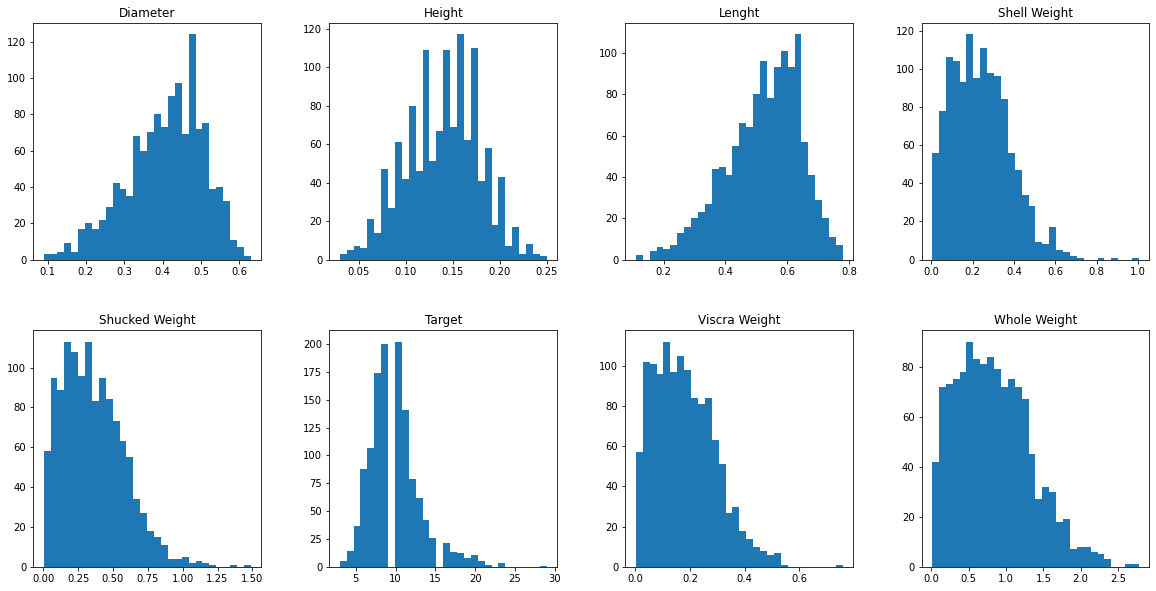

In [7]:
import warnings
warnings.filterwarnings('ignore')

train.hist(figsize = (20, 10), grid = False, layout = (2, 4), bins = 30)

In [8]:
numeric_features = train.select_dtypes(exclude = 'object').columns
categorical_features = train.select_dtypes(include = 'object').columns

print(numeric_features)
print(categorical_features)

Index(['Lenght', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight',
       'Viscra Weight', 'Shell Weight', 'Target'],
      dtype='object')
Index(['Gender'], dtype='object')


In [9]:
from scipy.stats import skew

skew_values = skew(train[numeric_features], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(numeric_features), columns = ['Features']),
                  pd.DataFrame(list(skew_values), columns = ['Skewness Degree'])], axis = 1)
dummy.sort_values(by = 'Skewness Degree', ascending = False)

,Features,Skewness Degree
7,Target,1.150866
4,Shucked Weight,0.795990
6,Shell Weight,0.699046
5,Viscra Weight,0.682571
3,Whole Weight,0.580391
2,Height,-0.108431
1,Diameter,-0.520600
0,Lenght,-0.559756


<AxesSubplot:xlabel='Gender', ylabel='count'>

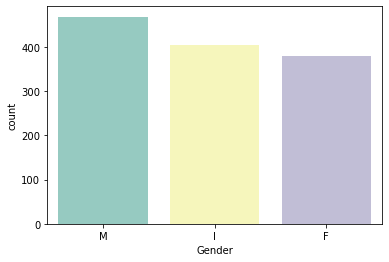

In [10]:
import seaborn as sns

sns.countplot(x = 'Gender', data = train, palette = 'Set3')

<AxesSubplot:xlabel='Gender', ylabel='Target'>

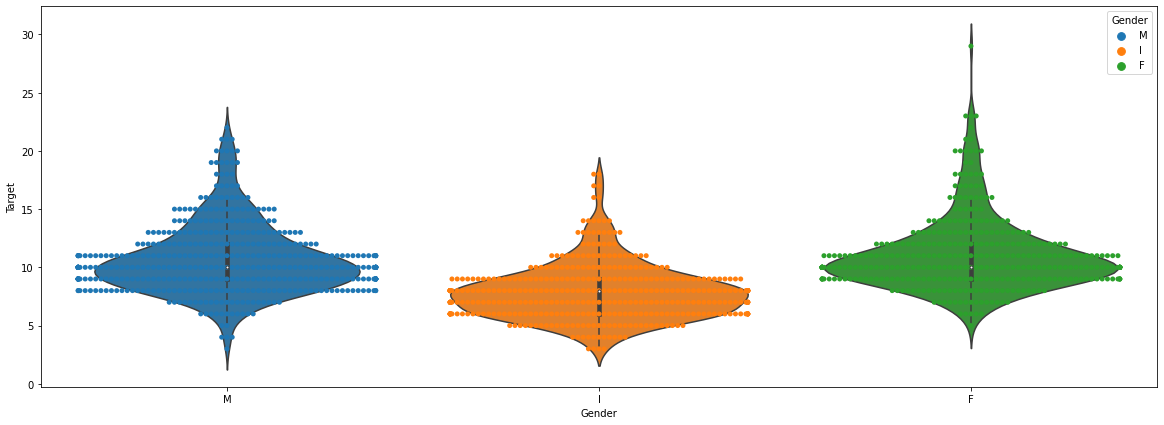

In [12]:
plt.figure(figsize = (20, 7))
sns.swarmplot(x = 'Gender', y = 'Target', data = train, hue = 'Gender')
sns.violinplot(x = 'Gender', y = 'Target', data = train)

In [15]:
train.groupby('Gender')[['Lenght', 'Diameter', 'Height', 'Whole Weight', 
                         'Shucked Weight', 'Viscra Weight', 'Shell Weight', 'Target']].mean().sort_values('Target')

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
Gender,,,,,,,,
I,0.431015,0.328119,0.108676,0.441911,0.196927,0.094717,0.130665,7.876238
M,0.556183,0.435704,0.151844,0.984917,0.427595,0.214050,0.280036,10.714286
F,0.579408,0.455316,0.157184,1.055354,0.446047,0.231962,0.307080,11.086842


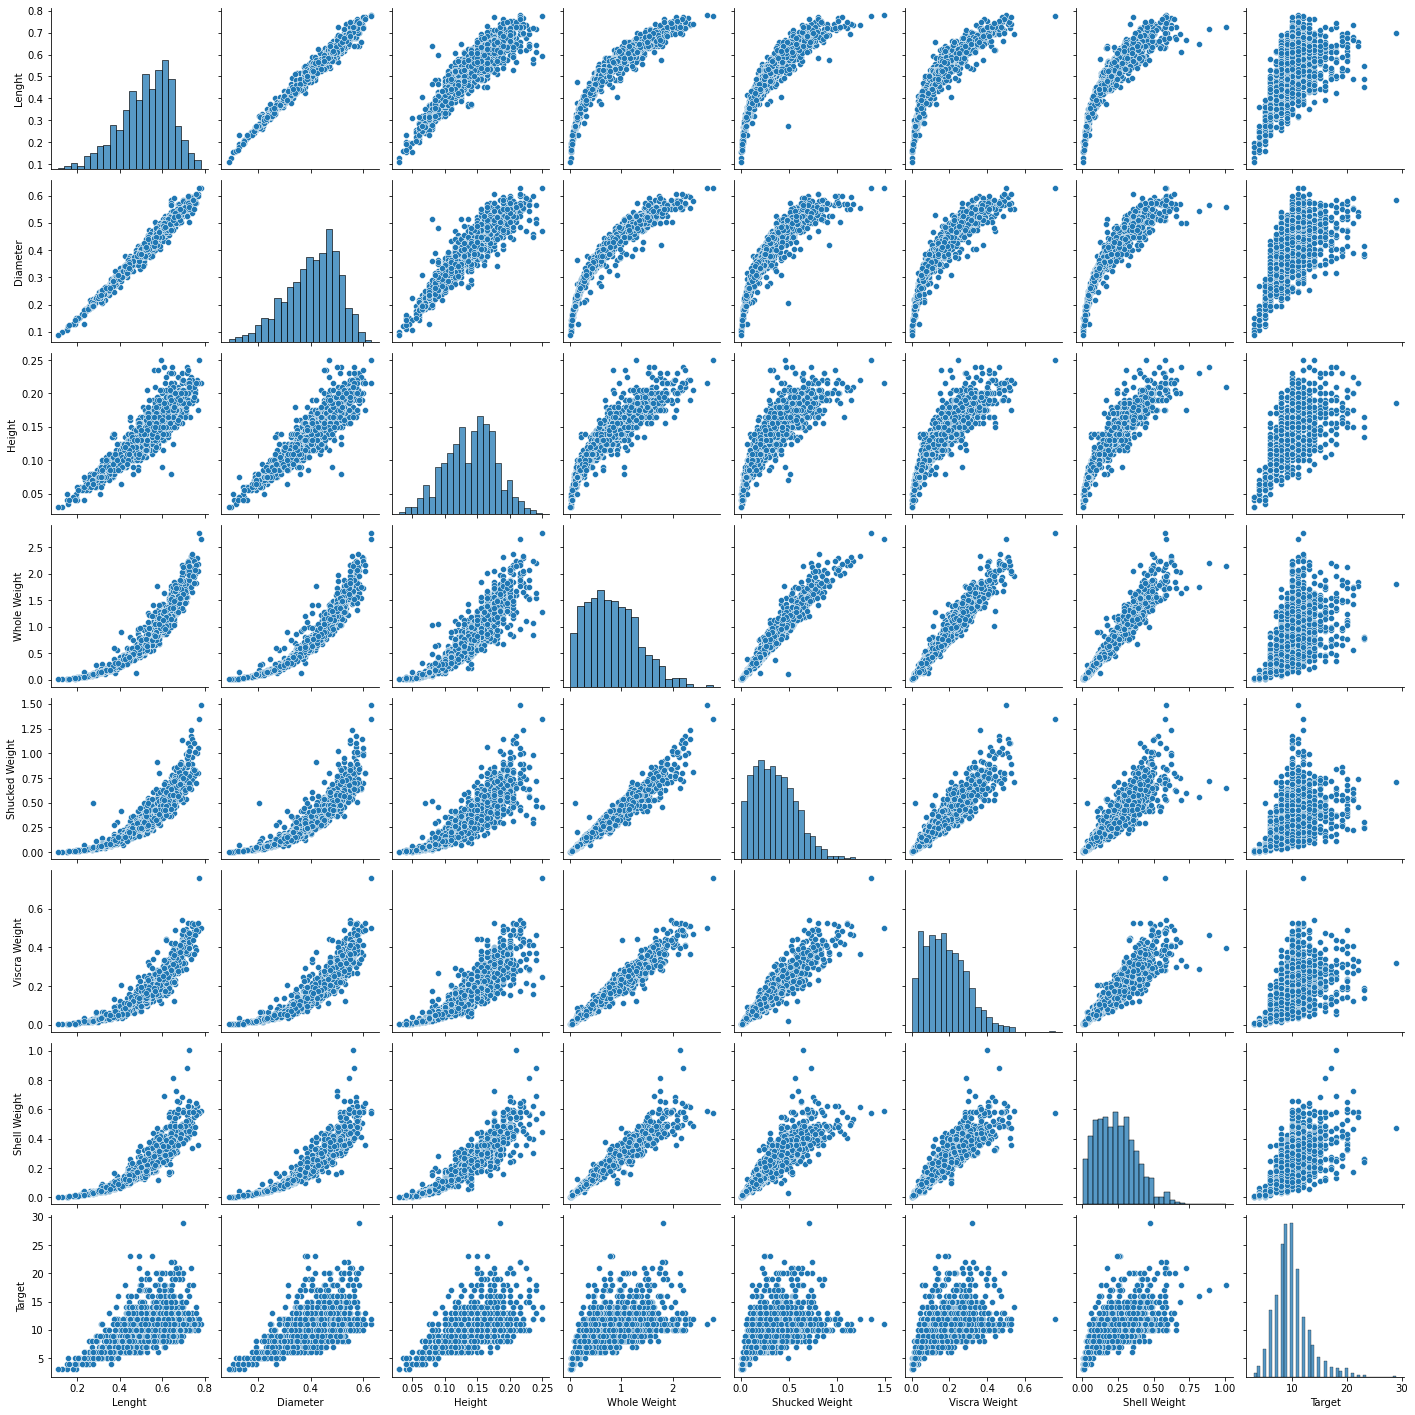

In [16]:
sns.pairplot(train[numeric_features])

<AxesSubplot:>

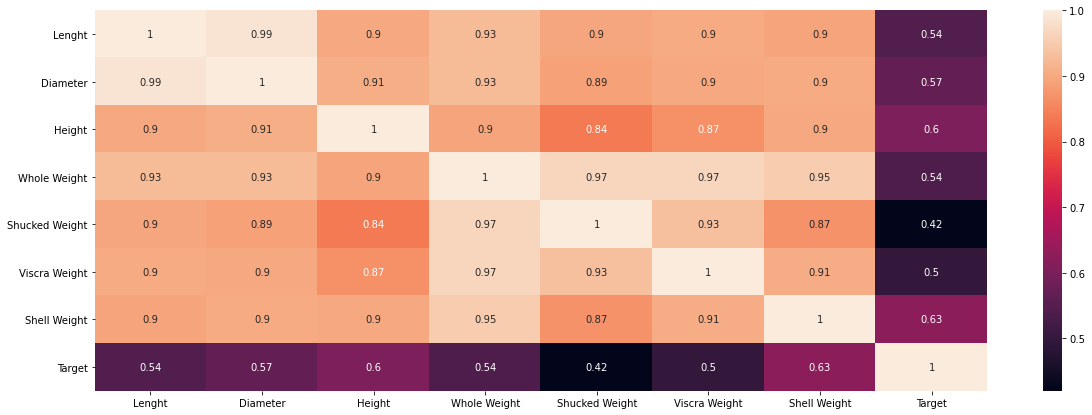

In [17]:
plt.figure(figsize = (20, 7))
sns.heatmap(train[numeric_features].corr(), annot = True)

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['Gender'] = le.fit_transform(train['Gender'])
test['Gender'] = le.transform(test['Gender'])

train.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,2,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,1,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,1,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,2,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,1,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [19]:
test.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
0,0,0.595,0.470,0.155,1.121,0.4515,0.1780,0.1550
1,2,0.580,0.450,0.150,0.927,0.2760,0.1815,0.3600
2,1,0.260,0.205,0.070,0.097,0.0415,0.0190,0.0305
3,2,0.590,0.460,0.130,1.102,0.4550,0.2055,0.3300
4,0,0.595,0.465,0.140,1.113,0.5175,0.2440,0.3050


<AxesSubplot:>

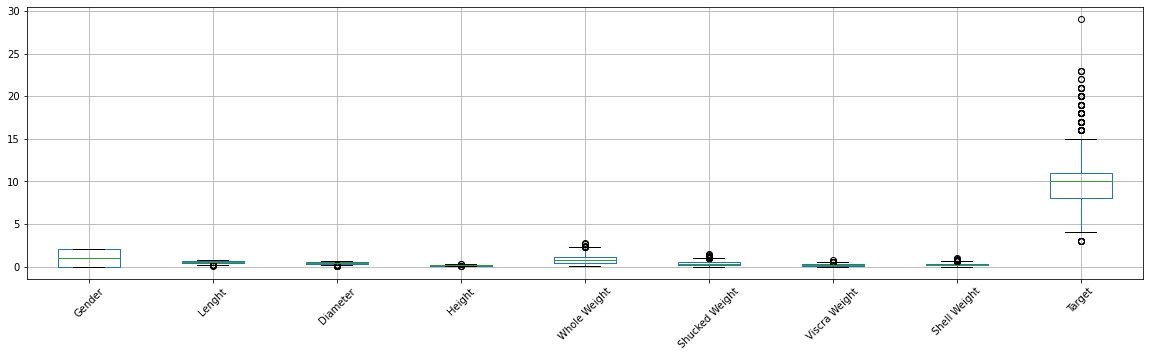

In [20]:
train.boxplot(rot = 45, figsize = (20, 5))

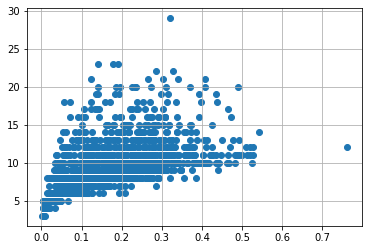

In [21]:
var = 'Viscra Weight'
plt.scatter(x = train[var], y = train['Target'],)
plt.grid(True)

In [23]:
train.drop(train[train['Viscra Weight'] > 0.7].index, inplace = True)
train.drop(train[(train['Viscra Weight'] < 0.4) & (train['Target'] > 25)].index, inplace = True)

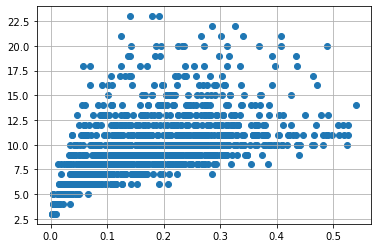

In [24]:
plt.scatter(x = train[var], y = train['Target'],)
plt.grid(True)

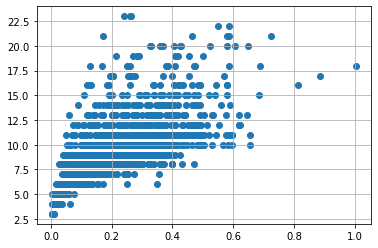

In [25]:
var = 'Shell Weight'
plt.scatter(x = train[var], y = train['Target'],)
plt.grid(True)

In [26]:
train.drop(train[train['Shell Weight'] > 0.9].index, inplace = True)

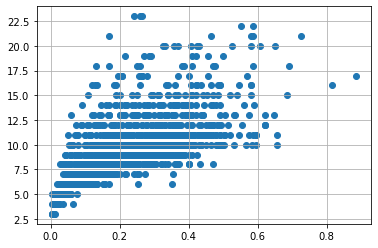

In [27]:
plt.scatter(x = train[var], y = train['Target'],)
plt.grid(True)

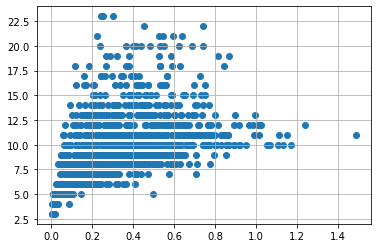

In [28]:
var = 'Shucked Weight'
plt.scatter(x = train[var], y = train['Target'])
plt.grid(True)

In [29]:
train.drop(train[train['Shucked Weight'] > 1.4].index, inplace = True)

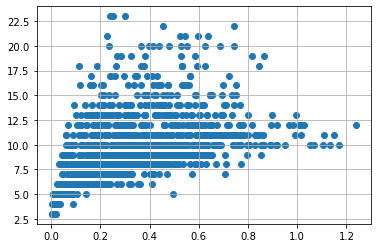

In [30]:
plt.scatter(x = train[var], y = train['Target'],)
plt.grid(True)

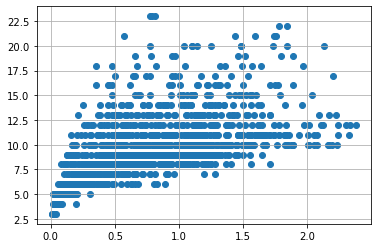

In [31]:
var = 'Whole Weight'
plt.scatter(x = train[var], y = train['Target'],)
plt.grid(True)

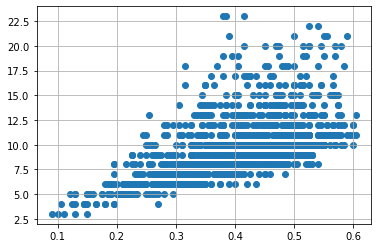

In [32]:
var = 'Diameter'
plt.scatter(x = train[var], y = train['Target'],)
plt.grid(True)

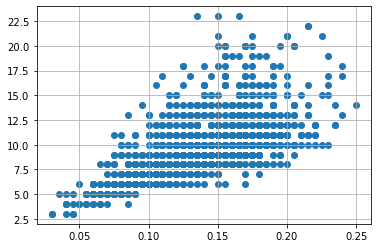

In [34]:
var = 'Height'
plt.scatter(x = train[var], y = train['Target'],)
plt.grid(True)

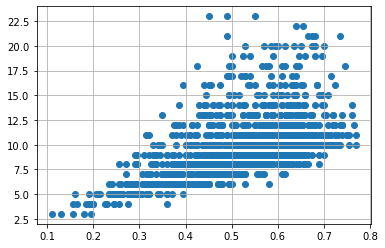

In [35]:
var = 'Lenght'
plt.scatter(x = train[var], y = train['Target'],)
plt.grid(True)

In [36]:
X = train.drop(['Target'], axis = 1)
y = train['Target']

In [38]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((999, 8), (250, 8), (999,), (250,))

array([[<AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Lenght'}>],
       [<AxesSubplot:title={'center':'Shell Weight'}>,
        <AxesSubplot:title={'center':'Shucked Weight'}>,
        <AxesSubplot:title={'center':'Viscra Weight'}>,
        <AxesSubplot:title={'center':'Whole Weight'}>]], dtype=object)

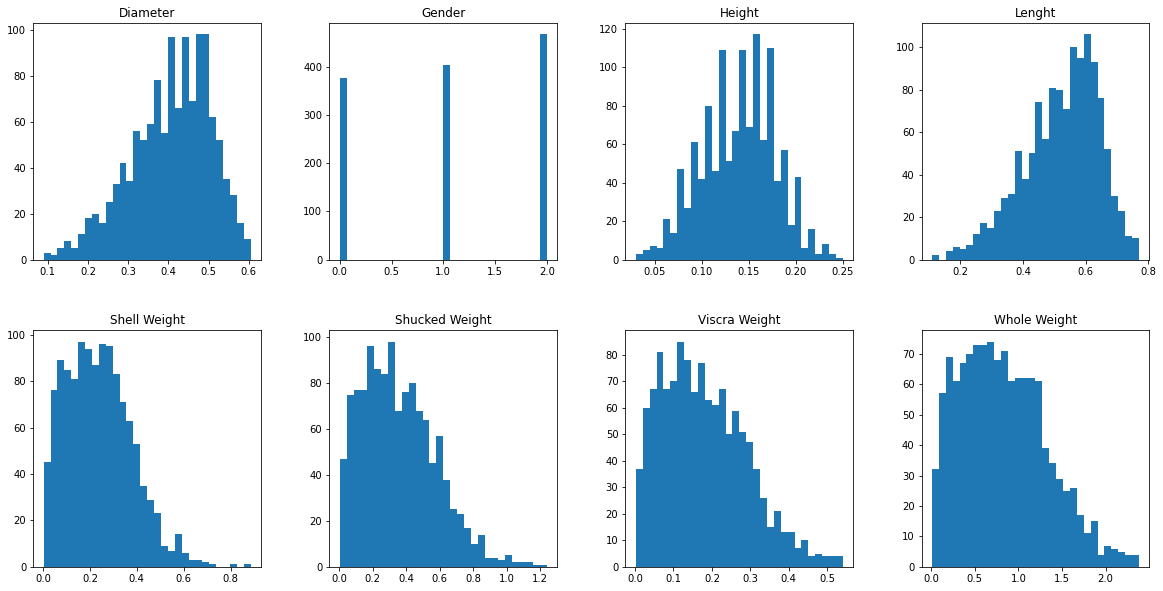

In [39]:
X.hist(figsize = (20, 10), grid = False, layout = (2, 4), bins = 30)

In [40]:
features = ['Diameter', 'Height', 'Lenght', 'Shell Weight', 'Shucked Weight', 'Viscra Weight', 'Whole Weight']

from sklearn.preprocessing import StandardScaler

for obj in features:
    sc = StandardScaler()
    X[obj] = sc.fit_transform(X[[obj]])
    test[obj] = sc.fit_transform(test[[obj]])
    
X.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
0,2,0.692084,0.641291,-0.626011,0.583263,0.162802,1.006740,0.508118
1,1,-0.769907,-0.920157,-1.141174,-0.909097,-0.823820,-0.907007,-0.956961
2,1,0.483228,0.842768,1.434639,0.993865,0.788796,0.671154,1.221052
3,2,0.107287,-0.013510,0.919477,0.900593,0.868180,1.328721,0.700610
4,1,-1.772416,-1.726066,-1.269965,-1.418041,-1.399917,-1.351432,-1.416803


In [43]:
X['Target'] = y

In [44]:
X.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,2,0.692084,0.641291,-0.626011,0.583263,0.162802,1.006740,0.508118,15
1,1,-0.769907,-0.920157,-1.141174,-0.909097,-0.823820,-0.907007,-0.956961,8
2,1,0.483228,0.842768,1.434639,0.993865,0.788796,0.671154,1.221052,18
3,2,0.107287,-0.013510,0.919477,0.900593,0.868180,1.328721,0.700610,13
4,1,-1.772416,-1.726066,-1.269965,-1.418041,-1.399917,-1.351432,-1.416803,6


In [41]:
test.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
0,0,0.587573,0.623431,0.360638,0.603526,0.416165,-0.022254,-0.604782
1,2,0.462605,0.421430,0.244272,0.204345,-0.378606,0.009973,0.883631
2,1,-2.203383,-2.053089,-1.617578,-1.503490,-1.440564,-1.486282,-1.508721
3,2,0.545917,0.522430,-0.221190,0.564431,0.432015,0.230958,0.665814
4,0,0.587573,0.572931,0.011541,0.587065,0.715053,0.585456,0.484301


In [45]:
from pycaret.regression import *

clf = setup(data = X, target = 'Target', session_id = 123)

,Description,Value
0,session_id,123
1,Target,Target
2,Original Data,"(1249, 9)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(874, 10)"


In [47]:
models = compare_models(sort = 'MAE', n_select = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,1.602,5.423,2.308,0.4601,0.1903,0.1542,0.011
br,Bayesian Ridge,1.645,5.296,2.283,0.472,0.191,0.1659,0.007
ridge,Ridge Regression,1.645,5.292,2.282,0.4723,0.1898,0.1662,0.007
lr,Linear Regression,1.647,5.296,2.283,0.4718,0.1886,0.1666,0.006
gbr,Gradient Boosting Regressor,1.671,5.726,2.366,0.4318,0.1927,0.1676,0.054
catboost,CatBoost Regressor,1.674,5.552,2.334,0.4463,0.1911,0.1675,1.163
rf,Random Forest Regressor,1.689,5.594,2.35,0.4365,0.1923,0.1686,0.171
et,Extra Trees Regressor,1.7,5.551,2.34,0.4417,0.1931,0.1706,0.128
knn,K Neighbors Regressor,1.709,5.787,2.384,0.4221,0.1955,0.1678,0.01
lightgbm,Light Gradient Boosting Machine,1.782,6.018,2.433,0.3971,0.2012,0.1789,0.043


In [48]:
tuned_models = [tune_model(i, n_iter = 10) for i in models]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.713,5.04,2.245,0.4415,0.1934,0.1799
1,1.841,7.94,2.818,0.3842,0.2183,0.177
2,1.56,4.165,2.041,0.4709,0.1828,0.1706
3,1.642,6.027,2.455,0.475,0.1825,0.154
4,1.693,5.015,2.239,0.4551,0.1833,0.1675
5,1.929,7.494,2.737,0.389,0.2183,0.1943
6,1.987,7.519,2.742,0.3978,0.2234,0.2006
7,1.54,4.388,2.095,0.4823,0.1821,0.1632
8,1.371,3.32,1.822,0.5114,0.167,0.1518
9,1.794,5.27,2.296,0.4194,0.2111,0.2035


In [49]:
blend_models = stack_models(estimator_list=tuned_models)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.583,4.617,2.149,0.4884,0.1812,0.1615
1,1.728,7.008,2.647,0.4565,0.1989,0.1591
2,1.47,3.802,1.95,0.517,0.1702,0.1538
3,1.5,4.845,2.201,0.578,0.1607,0.1362
4,1.579,4.397,2.097,0.5223,0.1685,0.1512
5,1.851,7.242,2.691,0.4095,0.2177,0.1852
6,1.8,6.846,2.616,0.4517,0.2128,0.1806
7,1.403,3.851,1.962,0.5457,0.1698,0.1448
8,1.334,3.236,1.799,0.5236,0.1606,0.1388
9,1.722,5.292,2.3,0.417,0.2074,0.1882


In [50]:
final_models = finalize_model(blend_models)

In [51]:
preds = predict_model(final_models, test)

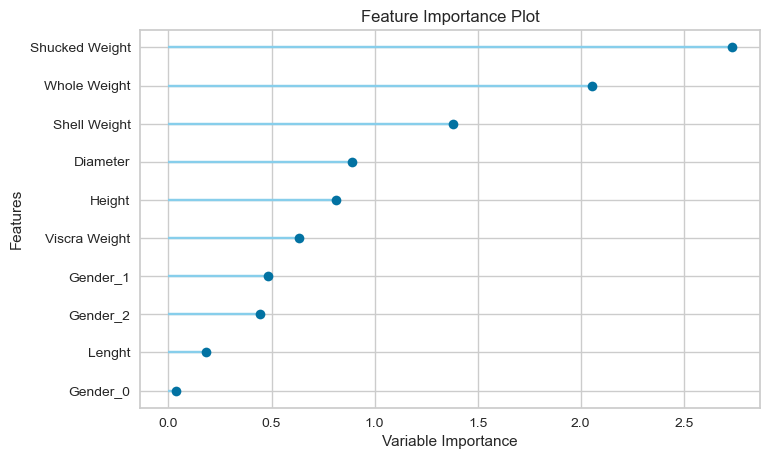

In [52]:
plot_model(estimator = tuned_models[0], plot = 'feature')

In [53]:
preds

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Label
0,0,0.587573,0.623431,0.360638,0.603526,0.416165,-0.022254,-0.604782,11.101676
1,2,0.462605,0.421430,0.244272,0.204345,-0.378606,0.009973,0.883631,13.869336
2,1,-2.203383,-2.053089,-1.617578,-1.503490,-1.440564,-1.486282,-1.508721,5.854707
3,2,0.545917,0.522430,-0.221190,0.564431,0.432015,0.230958,0.665814,11.419822
4,0,0.587573,0.572931,0.011541,0.587065,0.715053,0.585456,0.484301,9.718025
...,...,...,...,...,...,...,...,...,...
2919,1,-2.953193,-3.063097,-2.432138,-1.633121,-1.574158,-1.582963,-1.693865,4.161851
2920,1,-0.745421,-0.639079,-0.570287,-0.842990,-0.623151,-0.984461,-0.960550,7.598633
2921,1,0.379292,0.421430,-0.104825,-0.069320,0.099162,-0.358336,0.048667,9.537091
2922,1,-0.537141,-0.588578,-0.453922,-0.697927,-0.754480,-0.694418,-0.604782,9.360969


In [55]:
submission['Target'] = preds['Label']

In [56]:
submission.to_csv('Pycaret.csv', index = False)